In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [9]:
df = pd.read_csv("/content/Thyrioid_data.csv")

;
; Thyroid disease records supplied by the Garavan Institute and J. Ross
; Quinlan, New South Wales Institute, Syndney, Australia.
;
; 1987.
;

This directory contains the latest version of an archive of thyroid diagnoses
obtained from the Garvan Institute, consisting of 9172 records from 1984 to
early 1987.  Each record looks like

	(29 attribute values), diagnoses [record identification]

The attributes are given in order and separated by commas.  Unknown attribute
values are indicated by question marks.  The attributes are

	Attribute Name			Possible Values
	--------------			---------------
	age:				continuous.
	sex:				M, F.
	on thyroxine:			f, t.
	query on thyroxine:		f, t.
	on antithyroid medication:	f, t.
	sick:				f, t.
	pregnant:			f, t.
	thyroid surgery:		f, t.
	I131 treatment:			f, t.
	query hypothyroid:		f, t.
	query hyperthyroid:		f, t.
	lithium:			f, t.
	goitre:				f, t.
	tumor:				f, t.
	hypopituitary:			f, t.
	psych:				f, t.
	TSH measured:			f, t.
	TSH:				continuous.
	T3 measured:			f, t.
	T3:				continuous.
	TT4 measured:			f, t.
	TT4:				continuous.
	T4U measured:			f, t.
	T4U:				continuous.
	FTI measured:			f, t.
	FTI:				continuous.
	TBG measured:			f, t.
	TBG:				continuous.
	referral source:		WEST, STMW, SVHC, SVI, SVHD, other.

The diagnosis consists of a string of letters indicating diagnosed conditions.
A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
conditions are divided into groups where each group corresponds to a class of
comments.

		Letter	Diagnosis
		------	---------

	hyperthyroid conditions:

		A	hyperthyroid
		B	T3 toxic
		C	toxic goitre
		D	secondary toxic

	hypothyroid conditions:

		E	hypothyroid
		F	primary hypothyroid
		G	compensated hypothyroid
		H	secondary hypothyroid

	binding protein:

		I	increased binding protein
		J	decreased binding protein

	general health:

		K	concurrent non-thyroidal illness

	replacement therapy:

		L	consistent with replacement therapy
		M	underreplaced
		N	overreplaced

	antithyroid treatment:

		O	antithyroid drugs
		P	I131 treatment
		Q	surgery

	miscellaneous:

		R	discordant assay results
		S	elevated TBG
		T	elevated thyroid hormones

In experiments with an earlier version of this archive, decision trees were
derived for the most frequent classes of comments, namely

	hyperthyroid conditions (A, B, C, D)
	hypothyroid conditions (E, F, G, H)
	binding protein (I, J)
	general health (K)
	replacement therapy (L, M, N)
	discordant results (R)

In [10]:
df.head().T

,0,1,2,3,4
29,29,41,36,32,60
F,F,F,F,F,F
f,f,f,f,f,f
f.1,f,f,f,f,f
f.2,f,f,f,f,f
f.3,f,f,f,f,f
f.4,f,f,f,f,f
f.5,f,f,f,f,f
f.6,f,f,f,f,f
t,f,f,f,f,f


In [11]:
df.describe()

,29
count,9171.000000
mean,73.560680
std,1184.041182
min,1.000000
25%,37.000000
50%,55.000000
75%,68.000000
max,65526.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   29            9171 non-null   int64 
 1   F             9171 non-null   object
 2   f             9171 non-null   object
 3   f.1           9171 non-null   object
 4   f.2           9171 non-null   object
 5   f.3           9171 non-null   object
 6   f.4           9171 non-null   object
 7   f.5           9171 non-null   object
 8   f.6           9171 non-null   object
 9   t             9171 non-null   object
 10  f.7           9171 non-null   object
 11  f.8           9171 non-null   object
 12  f.9           9171 non-null   object
 13  f.10          9171 non-null   object
 14  f.11          9171 non-null   object
 15  f.12          9171 non-null   object
 16  t.1           9171 non-null   object
 17  0.3           9171 non-null   object
 18  f.13          9171 non-null   object
 19  ?     

The data has 30 elements i.e. 0 included but the attrbutes we have are 29 so adding additional column named 'diagnosis_column'

In [13]:
# List of attribute names (in order)
attribute_names = [
    "age", "sex", "on thyroxine", "query on thyroxine", "on antithyroid medication",
    "sick", "pregnant", "thyroid surgery", "I131 treatment", "query hypothyroid",
    "query hyperthyroid", "lithium", "goitre", "tumor", "hypopituitary", "psych",
    "TSH measured", "TSH", "T3 measured", "T3", "TT4 measured", "TT4",
    "T4U measured", "T4U", "FTI measured", "FTI", "TBG measured", "TBG",
    "referral source", "diagnosis_column"
]

In [14]:
df.columns = attribute_names

In [15]:
df.head().T

,0,1,2,3,4
age,29,41,36,32,60
sex,F,F,F,F,F
on thyroxine,f,f,f,f,f
query on thyroxine,f,f,f,f,f
on antithyroid medication,f,f,f,f,f
sick,f,f,f,f,f
pregnant,f,f,f,f,f
thyroid surgery,f,f,f,f,f
I131 treatment,f,f,f,f,f
query hypothyroid,f,f,f,f,f


In [16]:
df.tail().T

,9166,9167,9168,9169,9170
age,56,22,69,47,31
sex,M,M,M,F,M
on thyroxine,f,f,f,f,f
query on thyroxine,f,f,f,f,f
on antithyroid medication,f,f,f,f,f
sick,f,f,f,f,f
pregnant,f,f,f,f,f
thyroid surgery,f,f,f,f,f
I131 treatment,f,f,f,f,f
query hypothyroid,f,f,f,f,t


In [17]:
df.describe()

,age
count,9171.000000
mean,73.560680
std,1184.041182
min,1.000000
25%,37.000000
50%,55.000000
75%,68.000000
max,65526.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9171 non-null   int64 
 1   sex                        9171 non-null   object
 2   on thyroxine               9171 non-null   object
 3   query on thyroxine         9171 non-null   object
 4   on antithyroid medication  9171 non-null   object
 5   sick                       9171 non-null   object
 6   pregnant                   9171 non-null   object
 7   thyroid surgery            9171 non-null   object
 8   I131 treatment             9171 non-null   object
 9   query hypothyroid          9171 non-null   object
 10  query hyperthyroid         9171 non-null   object
 11  lithium                    9171 non-null   object
 12  goitre                     9171 non-null   object
 13  tumor                      9171 non-null   object
 14  hypopitu

Now, we have our dataset in csv with proper attributes i.e column names.

In [19]:
df.shape

(9171, 30)


# Data Analysis & Cleaning Pipeline


Step 1: Data Inspection & Preprocessing

Data Understanding and Preparation

Data Analysis, Cleaning, and Transformation

Begin: Data Exploration & Preprocessing

In [20]:
df.sample(50).T

,2032,8821,6649,2098,5444,5285,7604,8262,3526,3454,...,8919,6375,743,4678,693,254,7568,8273,6722,7725
age,21,37,47,75,45,83,13,34,63,75,...,62,76,47,52,67,55,73,67,63,34
sex,F,F,M,F,M,M,F,M,F,M,...,F,F,M,M,F,F,F,F,F,F
on thyroxine,f,f,f,t,t,f,f,f,f,f,...,t,f,f,f,f,f,f,t,f,f
query on thyroxine,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
on antithyroid medication,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
thyroid surgery,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,f,f,f,f,...,f,t,f,f,f,f,f,f,f,f
query hypothyroid,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f


Extracting respective diagnosis code (letters) from diagnosis column

In [21]:
# Example column name with diagnosis strings:
# df['diagnosis_column'] = ['A[840801013]', 'K[840801045]', '-[840801017]', 'A|B[840801018]']

# Extract the diagnosis part before the '['
df['diagnosis_code'] = df['diagnosis_column'].str.extract(r'^(.+?)\[')[0]

In [22]:
df.sample(70).T

,5133,8320,122,6985,116,7340,8827,7545,4642,2972,...,7250,6090,7205,395,5246,6178,538,6319,8718,8440
age,74,43,28,68,83,53,80,23,59,33,...,43,32,42,20,35,74,34,29,54,54
sex,F,M,M,F,F,F,F,F,?,F,...,F,M,F,F,F,F,F,M,F,M
on thyroxine,t,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
query on thyroxine,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,f,f,t
on antithyroid medication,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
thyroid surgery,f,f,t,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
query hypothyroid,f,f,f,f,f,f,f,f,f,f,...,f,f,f,t,f,f,f,f,t,f


To cross check the extraction of diagnosis code properly, we use;

In [23]:
# Example: filter rows matching the A|B[numbers] pattern
filtered_df = df[df['diagnosis_column'].str.match(r'^[A-Z]\|[A-Z]\[\d+\]')]

# Print the matching rows
print(filtered_df)

      age sex on thyroxine query on thyroxine on antithyroid medication sick  \
259    32   F            t                  f                         f    f   
416    55   F            f                  f                         f    f   
520    34   F            t                  f                         f    f   
1963   31   F            f                  f                         f    f   
2650   34   F            f                  f                         f    f   
3057   26   F            f                  f                         f    f   
4228   38   F            f                  f                         f    f   
4282   18   F            f                  f                         f    f   
4284   29   F            f                  f                         f    f   
4379   21   ?            f                  f                         f    f   
4402   41   M            f                  f                         f    f   
5329   19   F            f              

As the output shows, we extracted the diagnosis codes properly even of X|Y type

Now, lets apply the rule of th study i.e "The diagnosis consists of a string of letters indicating diagnosed conditions.
A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
conditions are divided into groups where each group corresponds to a class of
comments."

In [24]:
# - If there's a pipe (|), take the letter after the pipe
# - Else if multiple letters (e.g., AK), take the last one
# - If "-", label as "negative"

def extract_primary_diagnosis(code):
    if pd.isna(code):
        return None
    if code == "-":
        return "negative"
    if "|" in code:
        return code.split("|")[-1]  # more likely one
    return code[-1]  # last letter if no pipe

# Apply the logic
df['primary_diagnosis'] = df['diagnosis_code'].apply(extract_primary_diagnosis)

# Optional: View only diagnosis rows (not 'negative')
diagnosis_only = df[df['primary_diagnosis'] != '-']

# Print result
print(df[['diagnosis_column', 'primary_diagnosis']])


     diagnosis_column primary_diagnosis
0        -[840801014]          negative
1        -[840801042]          negative
2        -[840803046]          negative
3        S[840803047]                 S
4        -[840803048]          negative
...               ...               ...
9166     -[870119022]          negative
9167     -[870119023]          negative
9168     I[870119025]                 I
9169     -[870119027]          negative
9170     -[870119035]          negative

[9171 rows x 2 columns]


In [25]:
df.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
age,29,41,36,32,60,77,28,28,28,54,...,40,40,77,77,77,77,51,75,56,42
sex,F,F,F,F,F,F,F,F,F,F,...,F,F,F,?,F,F,F,F,M,M
on thyroxine,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
query on thyroxine,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
on antithyroid medication,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
thyroid surgery,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
query hypothyroid,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f


In [26]:
code_Check = df['primary_diagnosis']
print(code_Check.str.match(r'^[A-Z]\|[A-Z]\[\d+\]'))

0       False
1       False
2       False
3       False
4       False
        ...  
9166    False
9167    False
9168    False
9169    False
9170    False
Name: primary_diagnosis, Length: 9171, dtype: bool


"X|Y" is interpreted as "consistent with X, but more likely Y" rule applied

In [27]:
# Now, let's map the diagnosis codes to their respective groups.

diagnosis_group_mapping = {
    'negative': 'negative',
    'A': 'hyperthyroid conditions',
    'B': 'hyperthyroid conditions',
    'C': 'hyperthyroid conditions',
    'D': 'hyperthyroid conditions',

    'E': 'hypothyroid conditions',
    'F': 'hypothyroid conditions',
    'G': 'hypothyroid conditions',
    'H': 'hypothyroid conditions',

    'I': 'binding protein',
    'J': 'binding protein',

    'K': 'general health',

    'L': 'replacement therapy',
    'M': 'replacement therapy',
    'N': 'replacement therapy',

    'O': 'antithyroid treatment',
    'P': 'antithyroid treatment',
    'Q': 'antithyroid treatment',

    'R': 'discordant results',
    'S': 'miscellaneous',
    'T': 'miscellaneous',
}


In [28]:
df['class'] = df['primary_diagnosis'].map(diagnosis_group_mapping)

In [29]:
print(df[['primary_diagnosis','class']].sample(50))

     primary_diagnosis                   class
2129                 G  hypothyroid conditions
989           negative                negative
2138          negative                negative
8719          negative                negative
769           negative                negative
5594          negative                negative
2153          negative                negative
8542          negative                negative
1012                 L     replacement therapy
6104          negative                negative
315           negative                negative
7939          negative                negative
8516          negative                negative
820           negative                negative
8801          negative                negative
4612          negative                negative
8628          negative                negative
5884          negative                negative
4166          negative                negative
1246          negative                negative
7064         

In [32]:
# saving our previous df in a new dataframe and dropping extra columns like 'primary_diagnosis', 'diagnosis_column' 'primary_letter 'and 'diagnosis_code'

new_df = df.drop(columns=['primary_diagnosis', 'diagnosis_column', 'diagnosis_code'])

In [33]:
new_df.sample(50).T

,7973,7454,2815,6692,2716,6558,1846,8467,6679,7998,...,7506,4326,7616,831,3351,2738,5840,3852,1893,8302
age,73,84,37,40,15,46,70,69,78,48,...,81,74,74,68,61,80,58,25,65,71
sex,?,F,F,F,F,F,F,F,M,M,...,F,F,F,M,F,M,F,M,M,F
on thyroxine,f,f,t,f,f,f,f,f,f,f,...,f,f,f,t,f,f,f,f,f,f
query on thyroxine,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
on antithyroid medication,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
thyroid surgery,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,f,f,f,f,...,f,t,f,t,f,f,f,f,f,f
query hypothyroid,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f


In [34]:
# This code counts the number of occurrences of each value in the 'Class' column of the df dataframe.
new_df['class'].value_counts()

,count
class,
negative,6770
hypothyroid conditions,593
general health,561
binding protein,414
replacement therapy,336
discordant results,197
hyperthyroid conditions,182
miscellaneous,85
antithyroid treatment,33


In [35]:
new_df.shape

(9171, 30)

Checking *Duplicated*

In [36]:
# This code counts the number of duplicate rows in a Pandas DataFrame
new_df.duplicated().sum()

np.int64(10)

Checking *Null Values*

In [37]:
# This code uses the isna() function to check for null values in a dataframe and returns the sum of them.
new_df.isna().sum()

,0
age,0
sex,0
on thyroxine,0
query on thyroxine,0
on antithyroid medication,0
sick,0
pregnant,0
thyroid surgery,0
I131 treatment,0
query hypothyroid,0


In [38]:
for column in new_df.columns:
  # Count the number of missing values represented by '?'
  missing_count = new_df[column][new_df[column] == '?'].count()
  # If missing values are found, print the column name and count
  if missing_count != 0:
    print(f"Count of '?' in {column}:",column, missing_count)

Count of '?' in sex: sex 307
Count of '?' in TSH: TSH 842
Count of '?' in T3: T3 2603
Count of '?' in TT4: TT4 441
Count of '?' in T4U: T4U 808
Count of '?' in FTI: FTI 801
Count of '?' in TBG: TBG 8822


In [39]:
# Drop the 'TBG' column as it contains all missing values
new_df = new_df.drop('TBG', axis=1)

In [40]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'diagnosis_column', 'diagnosis_code', 'primary_diagnosis', 'class'],
      dtype='object')

In [41]:
new_df.shape

(9171, 29)

# Numerical and Categorical Features

In [42]:
numeric_features = [feature for feature in new_df.columns if new_df[feature].dtype != 'O']
categorical_features = [feature for feature in new_df.columns if new_df[feature].dtype == 'O']
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['age']

We have 28 categorical features : ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'referral source', 'class']


In [43]:
#finding dataytypes of each features
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9171 non-null   int64 
 1   sex                        9171 non-null   object
 2   on thyroxine               9171 non-null   object
 3   query on thyroxine         9171 non-null   object
 4   on antithyroid medication  9171 non-null   object
 5   sick                       9171 non-null   object
 6   pregnant                   9171 non-null   object
 7   thyroid surgery            9171 non-null   object
 8   I131 treatment             9171 non-null   object
 9   query hypothyroid          9171 non-null   object
 10  query hyperthyroid         9171 non-null   object
 11  lithium                    9171 non-null   object
 12  goitre                     9171 non-null   object
 13  tumor                      9171 non-null   object
 14  hypopitu

In [44]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9171.0,73.56068,1184.041182,1.0,37.0,55.0,68.0,65526.0


as you can see we have outlier in the age column. We would look into outliers later

In [45]:
#filling missing dat ain the form of ? by np.nan values
new_df.isin(['?']).sum().sum()

np.int64(5802)

Overall 5802 values are missing in the form of '?'

In [46]:
new_df.replace('?',np.nan,inplace=True)

In [47]:
new_df.shape

(9171, 29)

Removing More Redundant Columns from Dataset

In [48]:
# Since actual values are present in TSH, T3, TT4, T4U FTI so their measured values are not significant
# for prediction of thyroid disease so we can remove them
columns_to_drop = ['TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']
new_df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [49]:
#filling missing dat ain the form of ? by np.nan values
new_df.isin(['?']).sum().sum()

np.int64(0)

In [50]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9171 non-null   int64 
 1   sex                        8864 non-null   object
 2   on thyroxine               9171 non-null   object
 3   query on thyroxine         9171 non-null   object
 4   on antithyroid medication  9171 non-null   object
 5   sick                       9171 non-null   object
 6   pregnant                   9171 non-null   object
 7   thyroid surgery            9171 non-null   object
 8   I131 treatment             9171 non-null   object
 9   query hypothyroid          9171 non-null   object
 10  query hyperthyroid         9171 non-null   object
 11  lithium                    9171 non-null   object
 12  goitre                     9171 non-null   object
 13  tumor                      9171 non-null   object
 14  hypopitu

# Chekcking missing data

In [51]:
new_df.isna().sum().sort_values(ascending=False)

,0
T3,2603
TSH,842
T4U,808
FTI,801
TT4,441
sex,307
age,0
pregnant,0
sick,0
on antithyroid medication,0


In [52]:
new_df.sample(50).T

,5020,58,6275,409,8566,728,6296,923,8215,436,...,974,2695,3760,6120,1616,123,6514,1476,7738,5176
age,58,52,32,75,20,66,70,66,66,72,...,50,37,24,54,72,55,84,61,34,69
sex,M,F,M,M,F,M,F,F,M,F,...,F,F,M,F,F,F,F,F,M,F
on thyroxine,f,f,f,f,f,f,f,f,f,t,...,t,f,f,f,f,f,f,t,f,f
query on thyroxine,f,f,f,f,f,f,f,t,f,f,...,f,f,f,f,f,f,f,f,f,f
on antithyroid medication,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,f,t,f,f,f,...,f,f,f,f,f,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
thyroid surgery,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
query hypothyroid,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f


# Replacing a 'TSH', 'T3', 'TT4', 'T4U', 'FTI' datatype into numerical

In [53]:
lab_cols = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Convert each to float (will turn invalid strings like np.nan into actual NaNs)
for col in lab_cols:
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

In [54]:
print(new_df[lab_cols].isna().sum())
print(new_df[lab_cols].describe())

TSH     842
T3     2603
TT4     441
T4U     808
FTI     801
dtype: int64
               TSH           T3          TT4          T4U          FTI
count  8329.000000  6568.000000  8730.000000  8363.000000  8370.000000
mean      5.218993     1.970629   108.700305     0.976056   113.640746
std      24.185398     0.887579    37.522670     0.200360    41.551650
min       0.005000     0.050000     2.000000     0.170000     1.400000
25%       0.460000     1.500000    87.000000     0.860000    93.000000
50%       1.400000     1.900000   104.000000     0.960000   109.000000
75%       2.700000     2.300000   126.000000     1.065000   128.000000
max     530.000000    18.000000   600.000000     2.330000   881.000000


In [55]:
new_df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,9171.000000,8329.000000,6568.000000,8730.000000,8363.000000,8370.000000
mean,73.560680,5.218993,1.970629,108.700305,0.976056,113.640746
std,1184.041182,24.185398,0.887579,37.522670,0.200360,41.551650
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000


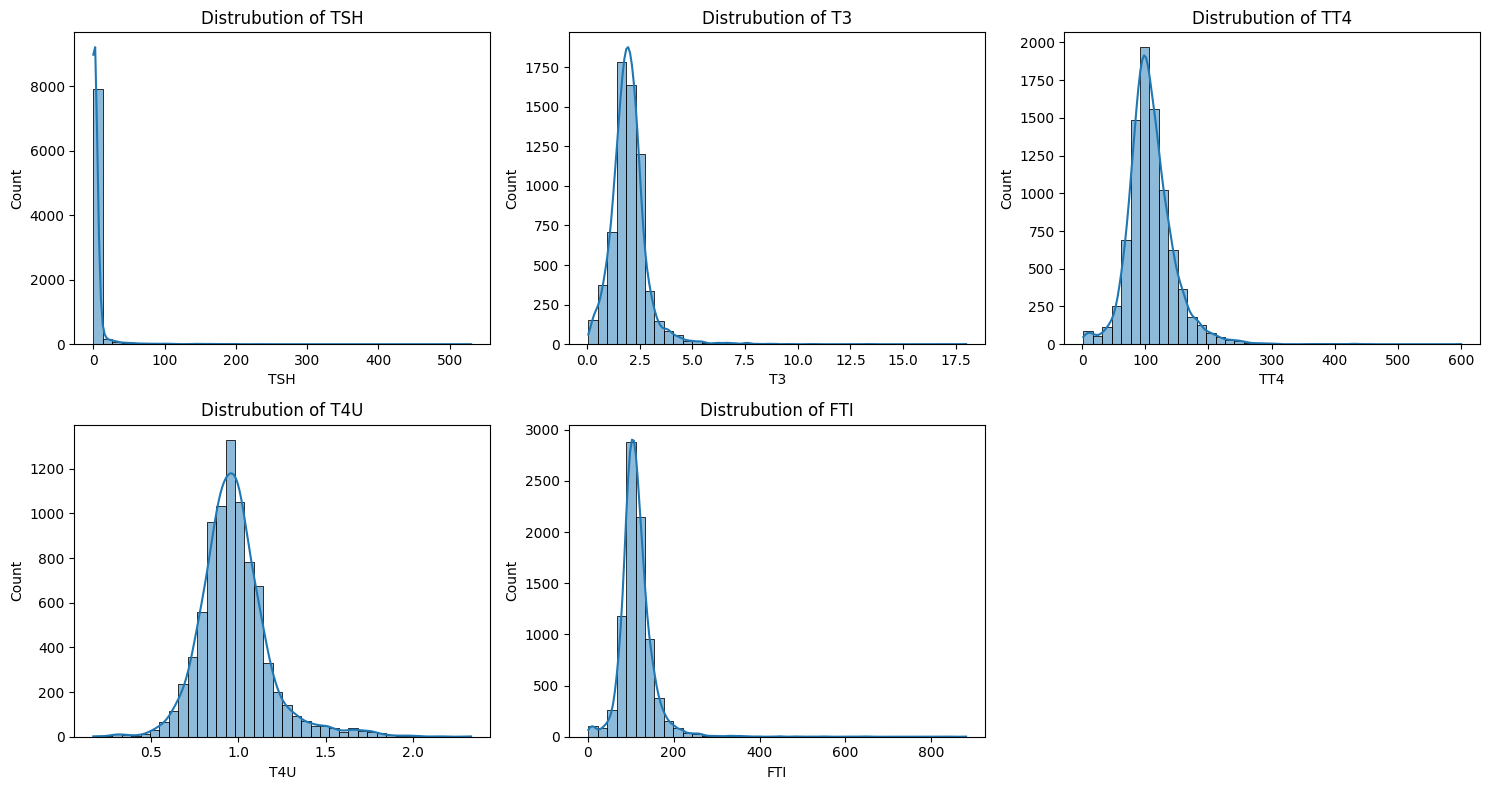

In [56]:
plt.figure(figsize=(15,8))
for i, col in enumerate(lab_cols):
  plt.subplot(2,3,i+1)
  sns.histplot(new_df[col], bins=40, kde=True)
  plt.title(f"Distrubution of {col}")

plt.tight_layout()
plt.show()

In [57]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9171 non-null   int64  
 1   sex                        8864 non-null   object 
 2   on thyroxine               9171 non-null   object 
 3   query on thyroxine         9171 non-null   object 
 4   on antithyroid medication  9171 non-null   object 
 5   sick                       9171 non-null   object 
 6   pregnant                   9171 non-null   object 
 7   thyroid surgery            9171 non-null   object 
 8   I131 treatment             9171 non-null   object 
 9   query hypothyroid          9171 non-null   object 
 10  query hyperthyroid         9171 non-null   object 
 11  lithium                    9171 non-null   object 
 12  goitre                     9171 non-null   object 
 13  tumor                      9171 non-null   objec

In [58]:
# Replace 't'/'f' with True/False
new_df.replace({'t': True, 'f': False}, inplace=True)

<ipython-input-58-cbf47fabfe31>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df.replace({'t': True, 'f': False}, inplace=True)


In [74]:
new_df.sample(10).T

,2555,8023,3612,7385,7816,6673,5813,4360,4682,5855
age,33,26,83,62,47,72,66,49,50,60
sex,F,M,M,M,F,F,F,M,M,M
on thyroxine,False,False,False,False,False,True,False,False,False,False
query on thyroxine,False,False,False,False,False,False,False,False,False,False
on antithyroid medication,False,False,False,False,False,False,False,False,False,False
sick,False,False,False,False,False,False,False,False,False,False
pregnant,False,False,False,False,False,False,False,False,False,False
thyroid surgery,False,False,False,False,False,False,False,True,False,False
I131 treatment,False,False,False,False,False,False,False,False,False,False
query hypothyroid,False,False,False,False,False,False,True,False,False,False


In [60]:
# Drop rows with missing target
new_df.dropna(subset=['class'], inplace=True)

Our dataset has extreme outliers, especially in important continuous features like age, TSH, T3, TT4, T4U, FTI

In [61]:
# Separate numeric and categorical columns
num_cols = new_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Use IQR method to detect & remove outliers
The IQR method is robust, avoids distortion from extreme values, and is commonly used in medical datasets.

In [62]:
def remove_outliers_iqr(new_df, columns, factor=1.5):
    clean_df = new_df.copy()
    for col in columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
    return clean_df

In [64]:
df_cleaned = remove_outliers_iqr(new_df, num_cols)
print(f"Original shape: {new_df.shape}")
print(f"After outlier removal: {df_cleaned.shape}")

Original shape: (9171, 23)
After outlier removal: (4672, 23)


# Visualize Before & After

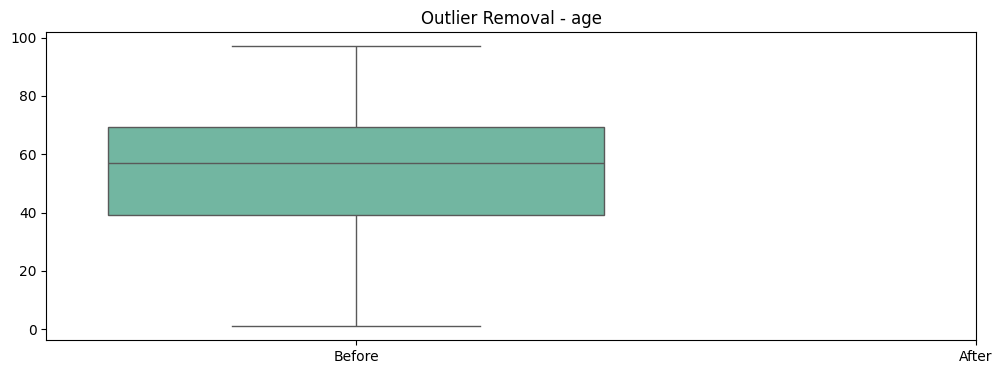

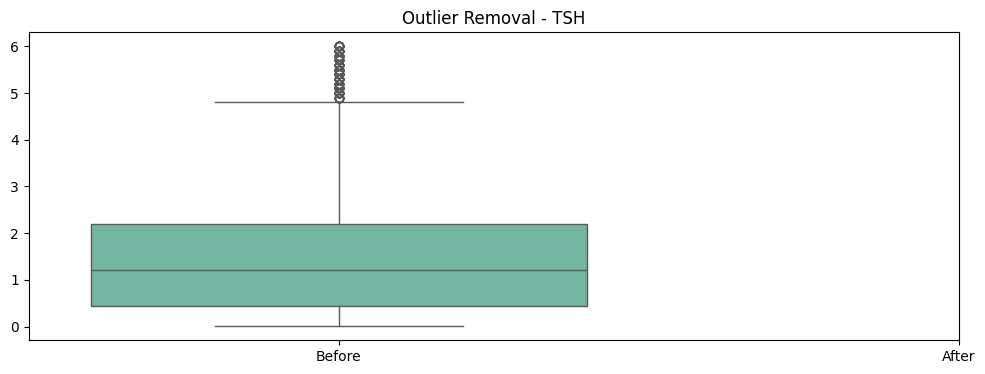

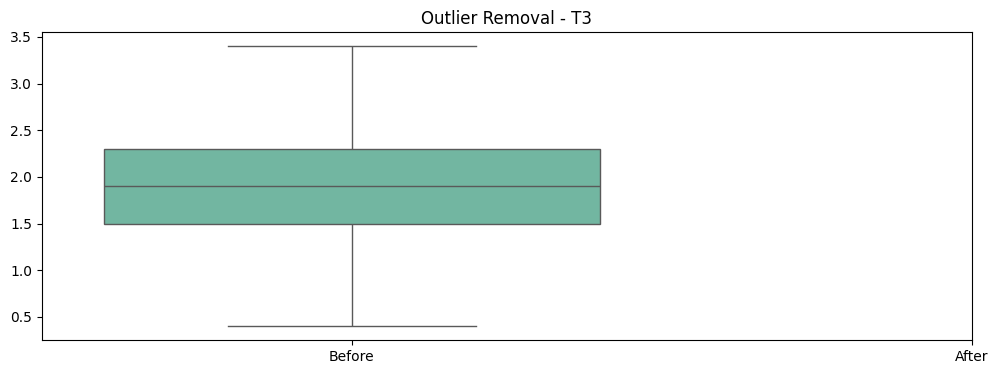

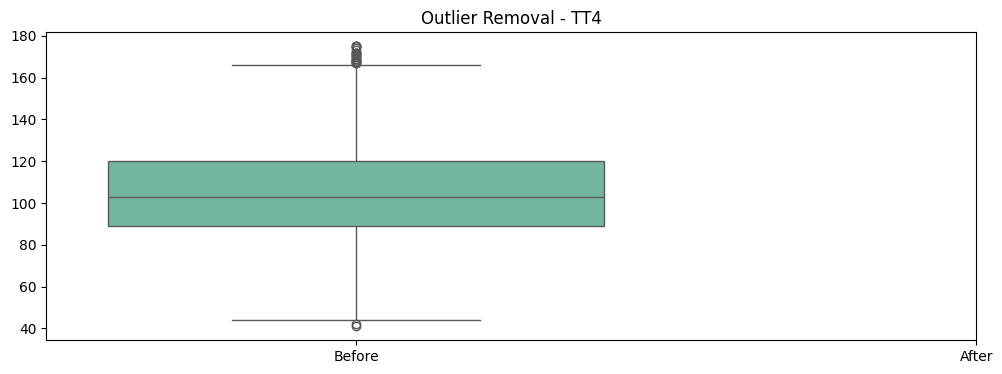

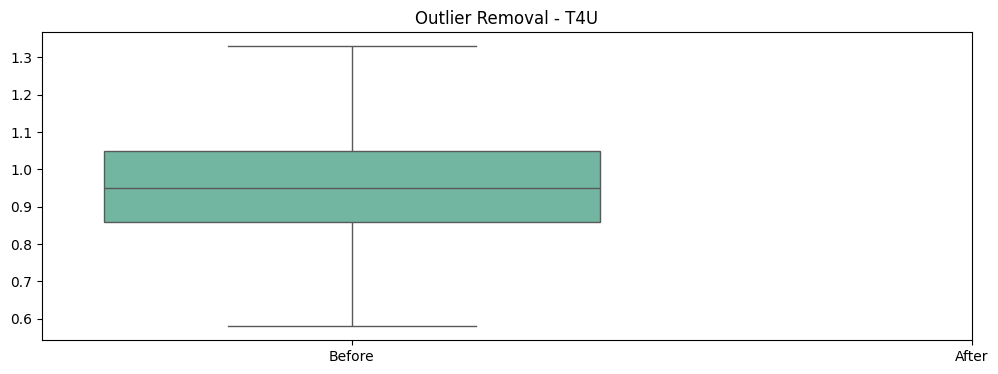

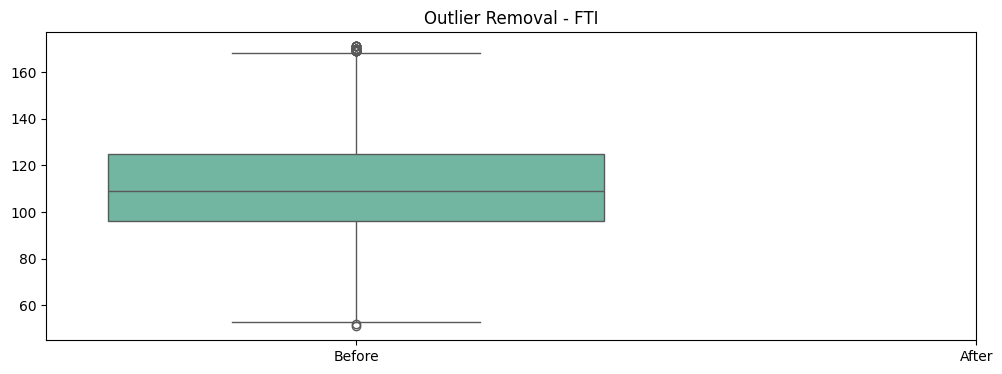

In [65]:
for col in num_cols:
    plt.figure(figsize=(12, 4))
    sns.boxplot(data=[new_df[col].dropna(), df_cleaned[col].dropna()], palette="Set2")
    plt.xticks([0, 1], ["Before", "After"])
    plt.title(f"Outlier Removal - {col}")
    plt.show()


In [66]:
df_cleaned.sample(50)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,class
3702,70,F,False,False,False,False,False,True,False,False,...,False,False,False,0.025,1.7,141.0,0.88,160.0,SVI,replacement therapy
560,58,M,False,False,False,False,False,False,False,False,...,False,False,False,0.100,2.2,113.0,0.83,136.0,other,negative
4814,62,M,False,False,False,False,False,False,False,False,...,False,False,False,1.300,2.5,91.0,1.02,90.0,SVI,negative
2470,72,F,False,False,False,False,False,False,False,False,...,False,False,False,1.400,1.4,115.0,0.97,118.0,SVHC,negative
1786,39,F,False,False,False,False,False,False,False,False,...,False,False,False,0.100,1.8,90.0,0.71,126.0,other,negative
3610,69,F,False,False,False,False,False,False,False,False,...,False,False,False,1.900,1.5,126.0,0.96,131.0,other,negative
7488,68,F,False,False,False,False,False,False,False,False,...,False,False,False,2.200,2.4,117.0,1.04,113.0,SVI,negative
4203,54,F,False,False,False,True,False,False,False,False,...,False,False,False,2.100,2.5,128.0,1.12,114.0,other,negative
2223,51,M,False,False,False,False,False,True,False,False,...,False,False,False,1.900,2.2,74.0,0.91,81.0,other,negative
48,64,F,True,False,False,False,False,False,False,False,...,False,False,False,2.500,1.6,86.0,0.96,90.0,other,negative


In [67]:
df_cleaned.describe()

,age,TSH,T3,TT4,T4U,FTI
count,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000
mean,54.001284,1.506645,1.882404,105.026541,0.953361,110.932577
std,18.603388,1.308576,0.553327,23.169323,0.139951,22.328611
min,1.000000,0.005000,0.400000,41.000000,0.580000,51.000000
25%,39.000000,0.440000,1.500000,89.000000,0.860000,96.000000
50%,57.000000,1.200000,1.900000,103.000000,0.950000,109.000000
75%,69.250000,2.200000,2.300000,120.000000,1.050000,125.000000
max,97.000000,6.000000,3.400000,175.000000,1.330000,171.000000


In [68]:
# Separate numeric and categorical columns
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df_cleaned.select_dtypes(include='object').columns.difference(['class']).tolist()

In [73]:
print(num_cols)
print(cat_cols)

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
['referral source', 'sex']


In [70]:
# Impute missing numeric values with median
num_imputer = SimpleImputer(strategy='median')
df_cleaned[num_cols] = num_imputer.fit_transform(df_cleaned[num_cols])

In [71]:
# Impute missing categorical values with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[cat_cols] = cat_imputer.fit_transform(df_cleaned[cat_cols])

Since these are binary features (yes/no indicators), Option 2 (0/1) is the best choice for Random Forest + MLFS + pipeline:

In [75]:
bool_cols = [
    'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant',
    'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid',
    'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych'
]

df_cleaned[bool_cols] = df_cleaned[bool_cols].replace({True: 1, False: 0})

<ipython-input-75-c68defb481f0>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned[bool_cols] = df_cleaned[bool_cols].replace({True: 1, False: 0})


# Encode Categorical Variables
Random Forest doesn’t need scaling but needs Label Encoding or OneHotEncoding for non-boolean categories.

In [77]:
# Encode referral source and other multi-class columns
df_cleaned['referral source'] = LabelEncoder().fit_transform(df_cleaned['referral source'])
df_cleaned['sex'] = LabelEncoder().fit_transform(df_cleaned['sex'])

# Encode target
target_encoder = LabelEncoder()
df_cleaned['class'] = target_encoder.fit_transform(df_cleaned['class'])

X = df_cleaned.drop(columns=['class'])
y = df_cleaned['class']

# Feature Selection using MLFS (ETC)

In [80]:
# ETC for feature importances
etc = ExtraTreesClassifier(n_estimators=200, max_depth=20, criterion='entropy', random_state=42)
etc.fit(X, y)

# Get feature importances
importances = etc.feature_importances_
feature_names = X.columns
selected_features = feature_names[importances > 0.015]
print("Selected Features:", selected_features.tolist())

# Filter dataset
X_selected = X[selected_features]


Selected Features: ['age', 'sex', 'on thyroxine', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'referral source']


# Train Random Forest
Based on the research paper we are implementing and following;

[Thyroid Disease Prediction Using Selective Features and Machine Learning Techniques](https://pmc.ncbi.nlm.nih.gov/articles/PMC9405591/#B22-cancers-14-03914)

In [89]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)

# Balance classes using SMOTE
smote = SMOTE(random_state=42,  k_neighbors=2)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Standardize features (fit on training only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Train classifier with class weights
clf = RandomForestClassifier(
    class_weight='balanced_subsample',
    random_state=42,
    n_estimators=200,
    max_depth=10
)
clf.fit(X_train_scaled, y_train_bal)

# 13. Predict and evaluate
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_, zero_division=0))


                         precision    recall  f1-score   support

  antithyroid treatment       0.00      0.00      0.00         1
        binding protein       0.53      0.57      0.55        14
     discordant results       0.83      0.75      0.79        20
         general health       0.99      0.96      0.97        73
hyperthyroid conditions       0.33      0.33      0.33         3
               negative       0.99      0.99      0.99       816
    replacement therapy       0.67      1.00      0.80         8

               accuracy                           0.97       935
              macro avg       0.62      0.66      0.63       935
           weighted avg       0.97      0.97      0.97       935



In [87]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.0 MB/s eta 0:00:00


In [90]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Models dictionary
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=500, class_weight='balanced', random_state=42),
    'SVM': SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, clf in models.items():
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42,  k_neighbors=1)),
        ('classifier', clf)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_macro')
    results[name] = scores
    print(f"{name} - Mean Macro F1: {scores.mean():.4f} (Std: {scores.std():.4f})")

# After this, pick the best performing model and train on full data


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Random Forest - Mean Macro F1: 0.6604 (Std: 0.0545)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:36:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:36:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:36:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not use

XGBoost - Mean Macro F1: 0.6778 (Std: 0.0463)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


CatBoost - Mean Macro F1: 0.6890 (Std: 0.0306)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression - Mean Macro F1: 0.4398 (Std: 0.0326)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


SVM - Mean Macro F1: 0.5984 (Std: 0.0304)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


KNN - Mean Macro F1: 0.4979 (Std: 0.0369)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


MLP - Mean Macro F1: 0.5862 (Std: 0.0442)


Simplify the diagnosis classes and optimize for fewer, more common conditions like hypothyroidism and hyperthyroidism

In [95]:
print(df_cleaned['class'].value_counts())

class
5    4079
3     364
2     100
1      67
6      40
4      17
0       5
Name: count, dtype: int64


In [99]:
# Assuming df_cleaned is your DataFrame and 'class' is the column of interest
value_counts_series = new_df['class'].value_counts()
value_names = value_counts_series.index.tolist()

print("Value names in the 'class' column:")
print(value_names)
print(new_df['class'].value_counts())

Value names in the 'class' column:
['negative', 'hypothyroid conditions', 'general health', 'binding protein', 'replacement therapy', 'discordant results', 'hyperthyroid conditions', 'miscellaneous', 'antithyroid treatment']
class
negative                   6770
hypothyroid conditions      593
general health              561
binding protein             414
replacement therapy         336
discordant results          197
hyperthyroid conditions     182
miscellaneous                85
antithyroid treatment        33
Name: count, dtype: int64


In [101]:
copy_new_df = new_df.copy() # for backup

new_df = remove_outliers_iqr(new_df, num_cols)

In [102]:
# Assuming df_cleaned is your DataFrame and 'class' is the column of interest
value_counts_series = new_df['class'].value_counts()
value_names = value_counts_series.index.tolist()

print("Value names in the 'class' column:")
print(value_names)
print(new_df['class'].value_counts())

Value names in the 'class' column:
['negative', 'general health', 'discordant results', 'binding protein', 'replacement therapy', 'hyperthyroid conditions', 'antithyroid treatment']
class
negative                   4079
general health              364
discordant results          100
binding protein              67
replacement therapy          40
hyperthyroid conditions      17
antithyroid treatment         5
Name: count, dtype: int64


In [106]:
# Simplify diagnosis labels
def simplify_diagnosis(label):
    if 'hypo' in label.lower() or label == 'replacement therapy':
        return 'hypothyroid'
    elif 'hyper' in label.lower() or label == 'antithyroid treatment':
        return 'hyperthyroid'
    else:
        return 'normal'

In [107]:
copy_df_cleaned = df_cleaned.copy()

# Apply mapping
df_cleaned['target'] = new_df['class'].apply(simplify_diagnosis)

In [108]:
print(df_cleaned['target'].value_counts())

target
normal          4610
hypothyroid       40
hyperthyroid      22
Name: count, dtype: int64


In [109]:
# Encode target
target_encoder = LabelEncoder()
df_cleaned['target'] = target_encoder.fit_transform(df_cleaned['target'])

In [110]:
df_cleaned.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,class,target
18,36.0,0,0,0,0,0,0,0,0,1,...,0,0,1.50,2.4,90.0,1.06,85.0,4,5,2
20,40.0,0,0,0,0,0,0,0,0,0,...,0,0,1.20,2.3,104.0,1.08,96.0,4,5,2
21,40.0,0,0,0,0,0,0,0,0,0,...,0,0,5.90,2.1,88.0,0.84,105.0,4,5,2
22,77.0,0,0,0,0,0,0,0,0,0,...,0,0,0.05,2.4,107.0,1.13,95.0,4,5,2
26,51.0,0,0,0,0,0,0,0,0,0,...,0,0,0.05,2.1,93.0,0.87,106.0,3,5,2


In [111]:
print(df_cleaned['target'].value_counts())

target
2    4610
1      40
0      22
Name: count, dtype: int64


In [113]:
# Downsample 'normal'
normal_df = df_cleaned[df_cleaned['target'] == 2].sample(n=300, random_state=42)
hypo_df = df_cleaned[df_cleaned['target'] == 1]
hyper_df = df_cleaned[df_cleaned['target'] == 0]

In [114]:
df_bal = pd.concat([normal_df, hypo_df, hyper_df]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_bal['target'].value_counts())

target
2    300
1     40
0     22
Name: count, dtype: int64


In [116]:
df_bal.drop(columns='class', axis=1)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,target
0,35.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.050,2.3,112.0,1.00,112.0,3,2
1,53.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0.300,1.8,83.0,1.09,76.0,4,2
2,19.0,1,0,0,0,0,0,0,0,0,...,0,0,1,2.700,2.7,121.0,1.17,104.0,1,2
3,70.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0.025,1.7,141.0,0.88,160.0,3,1
4,78.0,0,0,0,0,0,0,0,0,0,...,0,0,0,2.100,2.1,141.0,0.85,167.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,44.0,1,0,0,0,0,0,0,0,0,...,0,0,0,3.000,2.0,115.0,1.10,104.0,1,2
358,72.0,1,0,0,0,0,0,0,0,0,...,0,0,0,2.700,1.0,80.0,1.02,78.0,3,2
359,40.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1.030,2.0,98.0,0.95,103.0,4,2
360,50.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0.030,3.4,131.0,1.02,129.0,4,0


In [119]:
X = df_bal[selected_features]
y = df_bal['target']

In [120]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5: SMOTE on training data
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Step 6: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Train CatBoost

In [121]:
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train_scaled, y_train_bal)
y_pred_cat = cat_model.predict(X_test_scaled)

print("\nCatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))


CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      1.00      1.00         8
           2       1.00      0.95      0.97        61

    accuracy                           0.96        73
   macro avg       0.86      0.98      0.90        73
weighted avg       0.98      0.96      0.96        73



# Train Random Forest

In [122]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_bal)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      1.00      1.00         8
           2       1.00      0.95      0.97        61

    accuracy                           0.96        73
   macro avg       0.86      0.98      0.90        73
weighted avg       0.98      0.96      0.96        73



Stratified Cross-Validation (to average over random test splits)

In [124]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train_bal, cv=skf, scoring='f1_macro')
cat_scores = cross_val_score(cat_model, X_train_scaled, y_train_bal, cv=skf, scoring='f1_macro')

print(f"RF CV Macro F1: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")
print(f"CatBoost CV Macro F1: {cat_scores.mean():.4f} ± {cat_scores.std():.4f}")


RF CV Macro F1: 0.9861 ± 0.0088
CatBoost CV Macro F1: 0.9874 ± 0.0053


# Need to Save Best Model


In [125]:
import joblib
joblib.dump(rf_model, "thyroid_rf_model.pkl")

['thyroid_rf_model.pkl']

In [126]:
selected_features = ['age', 'sex', 'on thyroxine', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'referral source']
joblib.dump(selected_features, "selected_features.pkl")

['selected_features.pkl']

In [127]:
label_map = {'hypothyroid': 1, 'hyperthyroid': 0, 'normal': 2}
joblib.dump(label_map, "label_map.pkl")

['label_map.pkl']